In [2]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x=[]
y=[]
bhagyax0=[]
bhagyax1=[]
with open("data1.csv","r") as csvfile:
    lines=csv.reader(csvfile)
    dataset=list(lines)
    for i in range(len(dataset)):
        temp=dataset[i][0].split(",")
        a,b=float(temp[0]),float(temp[1])
        c=int(temp[2],2)
        if(c==0):
            bhagyax0.append([a,b])
        if(c==1):
            bhagyax1.append([a,b])
        x.append([a,b])
        y.append([c])
one=np.ones([len(x),1])
x=np.concatenate((one,x),axis=1)
#x=(x-np.mean(x))/np.std(x)
y=np.array(y)
bhagyax0=np.array(bhagyax0)
bhagyax1=np.array(bhagyax1)
#bhagyax0=(bhagyax0-np.mean(bhagyax0))/np.std(bhagyax0)
#bhagyax1=(bhagyax1-np.mean(bhagyax1))/np.std(bhagyax1)

In [3]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=.3)
theta = np.matrix(np.zeros(3))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#set gradient parameters
alpha = 0.01
iters = 1000

(70, 3) (30, 3) (70, 1) (30, 1)


C:\Users\Rishu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':


parameters after gradient descent= [[-0.05362187  0.24663321  0.2376712 ]]


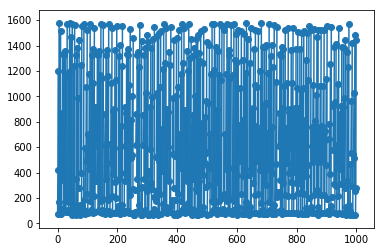

correct predictions out of 30 test points is  21
Accuracy achieved= 70.0 %


In [4]:
## Batch Gradient Descent ##
var=100
def gradientDescent(X,Y,theta,iters,alpha):
    cost=[]
    for i in range(0,iters):
        hypothesis=X*theta.T
        hypothesis=1/(1+np.exp((-1)*hypothesis))
        temp=np.log2(hypothesis)
        temp1=np.log2(1-hypothesis)
        v1=(-1)*(np.matmul(Y.T,temp))
        v2=(-1)*(np.matmul((1-Y).T,temp1))
        loss=hypothesis-Y
        fvalue=v1+v2
        cost.append(v1+v2)
        #if i>0:
            #print("iteration=",i,"| cost=",cost[i])
        gradient=(loss.T*X)/len(X)
        theta=theta-(alpha*(gradient+var/len(X)*theta))
    return theta,cost

g,cost=gradientDescent(x_train,y_train,theta,iters,alpha)
print("parameters after gradient descent=",g)
it=np.arange(0,iters)
plt.plot(it,np.squeeze(cost))
plt.scatter(it,np.squeeze(cost))
plt.show()

##calculating sum of squared error of the test data
tempy=np.matmul(x_test,g.transpose())
tempy=1/(1+np.exp((-1)*tempy))
tempy=np.where(tempy>=0.5,1,0)
tempy=np.squeeze(tempy)
count=0
for i in range(0,len(tempy)):
    if(tempy[i]==y_test[i]):
        count=count+1
print("correct predictions out of 30 test points is ",count)
print("Accuracy achieved=",count/len(tempy)*100,"%")

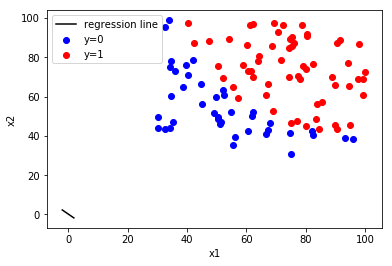

In [5]:
##Using entire dataset for plotting the graph as there are lesser test points
bhagyax0=np.array(bhagyax0)
bhagyax1=np.array(bhagyax1)
#print(bhagyax1)
plt.scatter([bhagyax0[:,0]],[bhagyax0[:,1]],c='b',label='y=0')
plt.scatter([bhagyax1[:,0]],[bhagyax1[:,1]],c='r',label='y=1')
x1=np.arange(-2,2,0.1)
x2=-(g[0,0]+g[0,1]*x1)/g[0,2]
plt.plot(x1,x2,c='k',label='regression line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()